In [1]:
#Import scripts we need
import numpy as np
import csv
from IPython.display import display, Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn import linear_model, svm
from sklearn.model_selection import train_test_split as cross_validation

#This is the stop words set
stop_words = set(stopwords.words('english')) 

In [2]:
# Reads data from a single file and sends it back as one line
# NOTE: Lowercases, strips, and lemmatizes all words
def GetDescFileData(path = str):
    # Open file path
    file_path = open(path, 'r')
    
    # Read line by line and append them all into data
    line = file_path.readline()
    data = []
    while line:
        wnl = WordNetLemmatizer()
        line = line.lower().strip().split()
        for word in line:
            if word not in stop_words:
                data.append(wnl.lemmatize(word))
        line = file_path.readline()
    return np.array(data)

In [3]:
# Reads all description data
# Outputs data as a list. First index is test data, second is training.
def GetDescriptionData():
    data = []
    train_data = []
    test_data = []
    for i in range(10000):
        train_data.append(GetDescFileData('data/descriptions_train/' + str(i)  + '.txt'))    
    for i in range(2000):
        test_data.append(GetDescFileData('data/descriptions_test/' + str(i) + '.txt'))    
    data.append(np.array(train_data))
    data.append(np.array(test_data))
    return np.array(data)

In [4]:
desc_data = GetDescriptionData()
print('Complete')

Complete


In [5]:
# Reads all tag data from a single file
def GetTagFileData(path = str):
    # Open file path
    file_path = open(path, 'r')
    
   # Read line by line and append them all into data
    line = file_path.readline()
    data = []
    while line:
        wnl = WordNetLemmatizer()
        split_line = line.split(':')
        line = (split_line[0].lower().strip(), split_line[1].lower().strip())
        for word in line:
            if word not in stop_words:
                word = wnl.lemmatize(word)
        data.append(line)
        line = file_path.readline()
    return np.array(data)

In [6]:
# Reads all tag data
def GetTagData():
    data = []
    train_data = []
    test_data = []
    for i in range(2000):
        test_data.append(GetTagFileData('data/tags_test/' + str(i) + '.txt'))
    for i in range(10000):
        train_data.append(GetTagFileData('data/tags_train/' + str(i) + '.txt'))
    data.append(np.array(train_data))
    data.append(np.array(test_data))
    return np.array(data)

In [7]:
tag_data = GetTagData()

In [8]:
# Reads data from one csv file 
# NOTE: Can't convert to numpy array, causes memory error.
def GetFeaturesFileData(path = str):
     # Open file path
    file_path = open(path, 'r')
    csv_reader = csv.reader(file_path, delimiter=',')
    
    # Read the csv row by row
    data = []
    for row in csv_reader:
        data.append(row)
    return data

In [9]:
# GetFeaturesFileData('data/features_train/features_resnet1000_train.csv')

In [10]:
# Display image function, takes index
def DisplayImages(list = [], data_type = str):
    for index in list:
        DisplayImage(index, data_type)

In [11]:
# Display a single image
def DisplayImage(index = int, data_type =str):
    if data_type is 'train':
        image = mpimg.imread('data/images_train/' + str(index) + '.jpg')
    elif data_type is 'test':
        image = mpimg.imread('data/images_test/' + str(index) + '.jpg')
    print('Image ' + str(index) + '\n')
    imgplot = plt.imshow(image)
    imgplot.axes.get_xaxis().set_visible(False)
    imgplot.axes.get_yaxis().set_visible(False)
    plt.show()           

Image 0



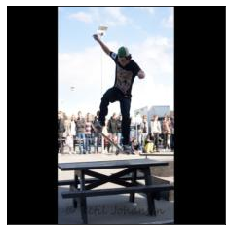

Image 1



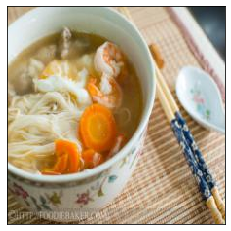

Image 2



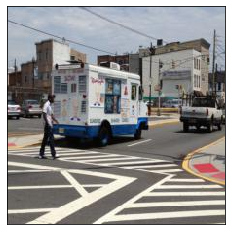

In [12]:
DisplayImages([0,1,2], 'train')

In [13]:
# Return a list of words of all words in the given data set 
# Input lists should be a list of lists of words.
def GetBagOfWordsVector (data = []):
    words = []
    for entry in data:
        for word in entry:
            if word not in words:
                words.append(word)
    return np.array(words)

In [14]:
DESC_BAG_VECTOR = GetBagOfWordsVector(desc_data[0])

In [20]:
print(DESC_BAG_VECTOR)

['skateboarder' 'putting' 'show' ... 'dismount.' 'clocktower.' 'forefront']


In [15]:
# Converts a given list of words and converts it into a bag of words representation based on the bag of words vector provided
def ConvertToBagVector(data = [], bag_vector = []):
    vector = [0 for i in range(len(bag_vector))]
    for word in data:
        if word in bag_vector:
            vector[np.where(np.isin(bag_vector, word))[0][0]] += 1              
    return np.array(vector)

In [17]:
# Below is an example that prints out a bag vector from index 20 from the training description data
convert1 = ConvertToBagVector(desc_data[1][20], DESC_BAG_VECTOR)
print(convert1)

[0 0 0 ... 0 0 0]


In [18]:
# Returns a numpy array of all descriptions as a bag of words
def ConvertDescToBagVector(data = [], bag_vector = []):
    return_data = []
    for desc in data:
        return_data.append(ConvertToBagVector(desc, bag_vector))
    return np.array(return_data)

In [19]:
# Below are the bag vectors of just the descriptions
DESC_BAG_VECTORS = ConvertDescToBagVector(desc_data[0], DESC_BAG_VECTOR)
TEST_DESC_BAG_VECTORS = ConvertDescToBagVector(desc_data[1], DESC_BAG_VECTOR)
print(DESC_BAG_VECTORS.shape)
print(TEST_DESC_BAG_VECTORS.shape)

(10000, 12436)
(2000, 12436)


In [21]:
# Combines description info and tag info
def CombineDescAndTags(desc_data = [], tag_data = []):
    return_data = []
    for i in range(len(desc_data)):
        new_line = []
        for word in desc_data[i]:
            new_line.append(word)
        for tag in tag_data[i]:
            for word in tag:
                new_line.append(word)
        return_data.append(np.array(new_line))
    return np.array(return_data)    

In [22]:
# Below is the combined data of desc and tags with no weighting to anything
COMBINED_FLAT_DATA = CombineDescAndTags(desc_data[0], tag_data[0])
COMBINED_FLAT_TEST_DATA = CombineDescAndTags(desc_data[1], tag_data[1])

In [23]:
print(COMBINED_FLAT_DATA[0])
print(tag_data[0][0][0][0])

['skateboarder' 'putting' 'show' 'using' 'picnic' 'table' 'stage.'
 'skateboarder' 'pulling' 'trick' 'top' 'picnic' 'table.' 'man' 'riding'
 'skateboard' 'top' 'table.' 'skate' 'boarder' 'trick' 'picnic' 'table.'
 'person' 'riding' 'skateboard' 'picnic' 'table' 'crowd' 'watching.'
 'vehicle' 'airplane' 'outdoor' 'bench' 'sports' 'skateboard' 'person'
 'person' 'vehicle' 'truck' 'accessory' 'backpack' 'accessory' 'handbag'
 'furniture' 'dining table']
vehicle


In [24]:
# Below is the combined data and desc with tags flat bag of words vector
COMBINED_FLAT_BAG_VECTOR = GetBagOfWordsVector(COMBINED_FLAT_DATA)

In [25]:
print(COMBINED_FLAT_BAG_VECTOR.shape)

(12453,)


In [26]:
FLAT_BAG_DATA = ConvertDescToBagVector(COMBINED_FLAT_DATA, COMBINED_FLAT_BAG_VECTOR)

MemoryError: 

In [ ]:
# Combines description info and tag info with weights
# Weights are done just by adding the word multiple times.
# NOTE: Tag weights are. Sub = 2. Super = 3.
def CombineDescAndTagsWeighted(desc_data = [], tag_data = []):
    return_data = []
    for i in range(len(desc_data)):
        new_line = []
        for word in desc_data[i]:
            new_line.append(word)
        for tag in tag_data[i]:
            new_line.append(tag[0])
            new_line.append(tag[0])
            new_line.append(tag[1])
            new_line.append(tag[1])
            new_line.append(tag[1])
        return_data.append(np.array(new_line))
    return np.array(return_data)    

In [ ]:
# Below is the combined data of desc and tags with no weighting to anything
COMBINED_WEIGHTED_DATA = CombineDescAndTagsWeighted(desc_data[0], tag_data[0])

In [ ]:
print(COMBINED_WEIGHTED_DATA[0])

In [ ]:
# Below is the combined bag of words vector for combined weighted data
COMBINED_WEIGHTED_BAG_VECTOR = GetBagOfWordsVector(COMBINED_WEIGHTED_DATA)

In [ ]:
print(COMBINED_WEIGHTED_BAG_VECTOR[0])